## Tarea 9
### Pruebas no paramétricas Kruskal_wallis

Importar paqueterias y datos

In [1]:
def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)

In [2]:
# Path to the file to be imported
path = "../data/Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
terminos = import_csv(path)

### Kruskal Wallis test

In [3]:
from scipy.stats import kruskal

def kruskal_wallis_test(*groups, alpha=0.05):
    """
    Performs the Kruskal-Wallis H-test for independent samples.
    Accepts multiple groups as arguments.
    Prints the H statistic, p-value, and interpretation.
    """
    result = kruskal(*groups)
    
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

Post hoc test

In [4]:
import scikit_posthocs as sp
# You need to install the scikit-posthocs package: conda install -c conda-forge scikit-posthocs

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    """
    Runs Dunn's post-hoc test after Kruskal-Wallis.
    """
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result

## Evaluate TA 
### Plots

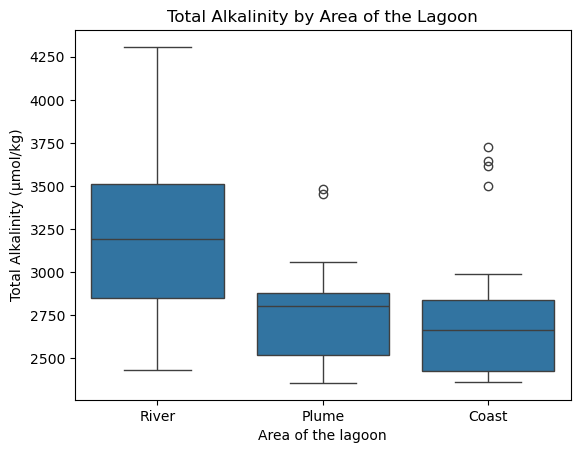

In [6]:
# Plot ta values for each area of the lagoon using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='area', y='ta_micromol_kg', data=terminos)
plt.xlabel('Area of the lagoon')
plt.ylabel('Total Alkalinity (μmol/kg)')
plt.title('Total Alkalinity by Area of the Lagoon')
plt.show()

Select data

In [7]:
# Select the data for each area of the lagoon
ta_river = terminos[terminos['area'] == 'River']['ta_micromol_kg']
ta_plume = terminos[terminos['area'] == 'Plume']['ta_micromol_kg']
ta_coast= terminos[terminos['area'] == 'Coast']['ta_micromol_kg']

Execute kruskal wallis test

In [8]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(ta_river, ta_plume, ta_coast)

H statistic = 23.340675555846637
p-value = 8.543517259038796e-06
The difference between groups is statistically significant.


Execute posthoc 

In [9]:
dunn_posthoc(terminos, 'area', 'ta_micromol_kg')

          Coast     Plume     River
Coast  1.000000  1.000000  0.000016
Plume  1.000000  1.000000  0.000659
River  0.000016  0.000659  1.000000


,Coast,Plume,River
Coast,1.000000,1.000000,0.000016
Plume,1.000000,1.000000,0.000659
River,0.000016,0.000659,1.000000


## Exercise
### Perform boxplot, Kuskal wallis test and posthoc for DIC and Temperature

## DIC
Boxplot

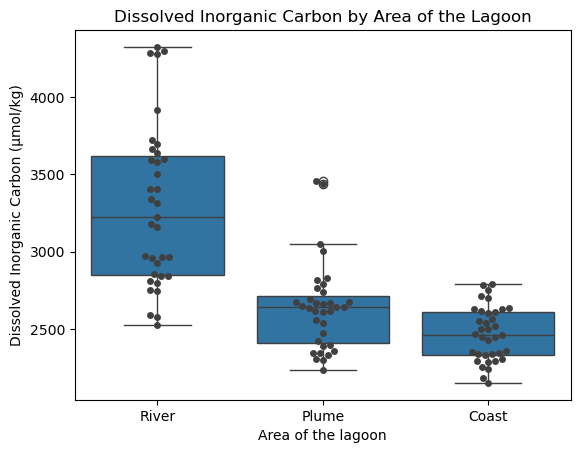

In [14]:
# Plot ta values for each area of the lagoon using seaborn

sns.boxplot(x='area', y='dic_micromol_kg', data=terminos)
sns.swarmplot(x='area', y='dic_micromol_kg', data=terminos, color=".25")
plt.xlabel('Area of the lagoon')
plt.ylabel('Dissolved Inorganic Carbon (μmol/kg)')
plt.title('Dissolved Inorganic Carbon by Area of the Lagoon')
plt.show()

Select DIC data

In [11]:
# Select the data for each area of the lagoon
dic_river = terminos[terminos['area'] == 'River']['dic_micromol_kg']
dic_plume = terminos[terminos['area'] == 'Plume']['dic_micromol_kg']
dic_coast= terminos[terminos['area'] == 'Coast']['dic_micromol_kg']

Perform tests

In [12]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(dic_river, dic_plume, dic_coast)

H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.


In [13]:
dunn_posthoc(terminos, 'area', 'dic_micromol_kg')

              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


There were significant differences among groups. Particullarly, plume differ the most from the areas, but none of them are estatistically simmilar

## Temperature
Boxplot

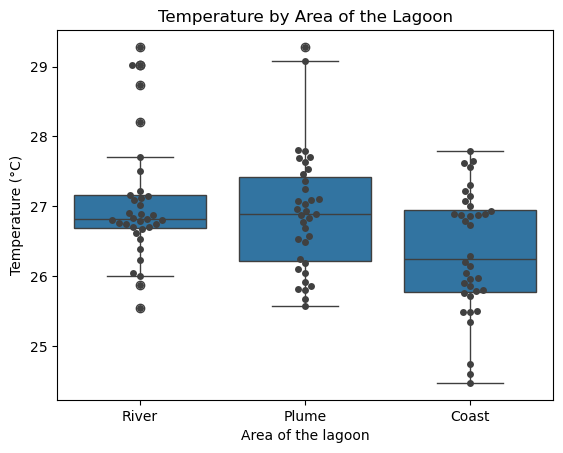

In [15]:
# Plot ta values for each area of the lagoon using seaborn

sns.boxplot(x='area', y='temp_c', data=terminos)
sns.swarmplot(x='area', y='temp_c', data=terminos, color=".25")
plt.xlabel('Area of the lagoon')
plt.ylabel('Temperature (°C)')
plt.title('Temperature by Area of the Lagoon')
plt.show()

Select Temperature data

In [16]:
# Select the data for each area of the lagoon
temp_river = terminos[terminos['area'] == 'River']['temp_c']
temp_plume = terminos[terminos['area'] == 'Plume']['temp_c']
temp_coast= terminos[terminos['area'] == 'Coast']['temp_c']

Perform tests

In [17]:
# Perform the Kruskal-Wallis test
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


In [18]:
dunn_posthoc(terminos, 'area', 'temp_c')

          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000


In this case, significant differences between groups were found, but the post hoc test let us know that plume and river areas had simmilar temperature values, unlike coast which was the one that differ significatevly